In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import seaborn as sn

In [2]:
digits = load_digits()

In [3]:
data = pd.DataFrame(digits.data,columns = digits.feature_names)

In [4]:
data

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [5]:
target = digits.target

In [6]:
X_train , X_test , y_train , y_test = train_test_split(data,target,test_size=0.2)

In [7]:
knn = KNeighborsClassifier()

In [8]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [9]:
knn.score(X_test,y_test)

0.975

In [10]:
search = GridSearchCV(knn,{'n_neighbors' : [3,4,5],"weights" : ['uniform', 'distance']})

In [11]:
search.fit(data,target)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 4, 5],
                         'weights': ['uniform', 'distance']})

In [12]:
results = pd.DataFrame(search.cv_results_)

In [13]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004596,0.000795,0.026987,0.004647,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.955556,0.958333,0.966574,0.986072,0.966574,0.966622,0.010672,2
1,0.003598,0.000490,0.012337,0.001249,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.955556,0.958333,0.969359,0.986072,0.961003,0.966065,0.011018,3
2,0.004209,0.000503,0.028626,0.005287,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.947222,0.958333,0.966574,0.980501,0.966574,0.963841,0.010946,4
3,0.003797,0.000748,0.013595,0.001016,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.958333,0.963889,0.963788,0.983287,0.966574,0.967174,0.008490,1
4,0.003398,0.000490,0.027392,0.003818,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.947222,0.955556,0.966574,0.980501,0.963788,0.962728,0.011169,6
5,0.003799,0.000750,0.013607,0.001368,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.952778,0.955556,0.966574,0.980501,0.961003,0.963282,0.009824,5


In [14]:
search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [15]:
knn_best = KNeighborsClassifier(n_neighbors=4,weights="distance")

In [16]:
knn_best.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [17]:
y_predicted = knn.predict(X_test)

In [19]:
cm = confusion_matrix(y_test,y_predicted)

Text(42.0, 0.5, 'Truth')

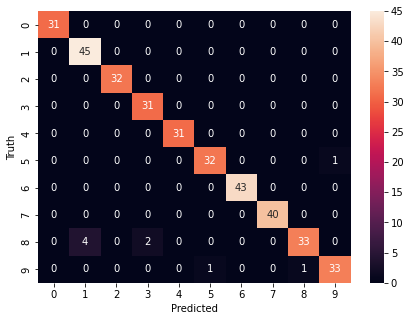

In [21]:
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.92      1.00      0.96        45
           2       1.00      1.00      1.00        32
           3       0.94      1.00      0.97        31
           4       1.00      1.00      1.00        31
           5       0.97      0.97      0.97        33
           6       1.00      1.00      1.00        43
           7       1.00      1.00      1.00        40
           8       0.97      0.85      0.90        39
           9       0.97      0.94      0.96        35

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360

